In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [2]:
!python --version

Python 3.6.10 :: Anaconda, Inc.


In [3]:
import cmdbench

In [4]:
results = cmdbench.benchmark_command("node --expose-gc test.js")

In [5]:
results

{'cpu': {'total_time': 20.34,
  'percentages': array([  0. , 154.8,   0. , ...,   0. ,   0. ,   0. ]),
  'percentages_stats': Stats(mean=26.15336787564767, std=67.2017203866711)},
 'memory': {'max': 4449951744,
  'values': array([ 24727552,  27496448,  28774400, ..., 157290496,  78663680,
          78663680]),
  'values_stats': Stats(mean=789525080.3019985, std=1041159372.1457142)},
 'disk': {'io_counters': pio(read_count=235, write_count=116, read_bytes=0, write_bytes=8388608, read_chars=8465568, write_chars=8389637)},
 'process': {'stdout_data': 'Running master process\n\nRunning child process #1\n\nRunning child process #3\n\nRunning child process #5\n\nRunning child process #6\n\nRunning child process #8\n\nRunning child process #4\n\nRunning child process #2\n\nRunning child process #7\n',
  'stderr_data': '',
  'execution_time': 8487},
 'gnu_time_results': {'Command being timed': '"node --expose-gc test.js"',
  'User time (seconds)': '21.34',
  'System time (seconds)': '1.78',
  

In [6]:
results["gnu_time_results"]["Maximum resident set size (kbytes)"]

'614148'

In [7]:
process_stdout_data = results["process"]["stdout_data"]
process_stderr_data = results["process"]["stderr_data"]
print("STDOUT: \n\n%s" % process_stdout_data)
print("STDERR: \n\n%s" % process_stderr_data)

STDOUT: 

Running master process

Running child process #1

Running child process #3

Running child process #5

Running child process #6

Running child process #8

Running child process #4

Running child process #2

Running child process #7

STDERR: 




In [8]:
results_cpu_percentages = results["cpu"]["percentages"]
results_memory_values = results["memory"]["values"]

In [9]:
execution_time_ms = results["process"]["execution_time"]
# Should be equal
cpu_samples_per_ms = len(results_cpu_percentages) / execution_time_ms
memory_samples_per_ms = len(results_memory_values) / execution_time_ms

print("Execution time (ms): %s" % execution_time_ms)
print("Cpu samples per second: %s" % (cpu_samples_per_ms*1000))
print("Memory samples per second: %s" % (memory_samples_per_ms*1000))

Execution time (ms): 8487
Cpu samples per second: 159.1846353246141
Memory samples per second: 159.1846353246141


In [10]:
## DISK USAGE
# https://psutil.readthedocs.io/en/latest/#psutil.Process.io_counters
disk_io_counters_read = results["disk"]["io_counters"].read_chars
disk_io_counters_write = results["disk"]["io_counters"].write_chars
disk_io_counters_total = disk_io_counters_read + disk_io_counters_write

print(results["disk"]["io_counters"])
print("Total disk I/O (bytes): %s" %  disk_io_counters_total)
print("Total disk read (bytes): %s" %  disk_io_counters_read)
print("Total disk write (bytes): %s" %  disk_io_counters_write)

pio(read_count=235, write_count=116, read_bytes=0, write_bytes=8388608, read_chars=8465568, write_chars=8389637)
Total disk I/O (bytes): 16855205
Total disk read (bytes): 8465568
Total disk write (bytes): 8389637


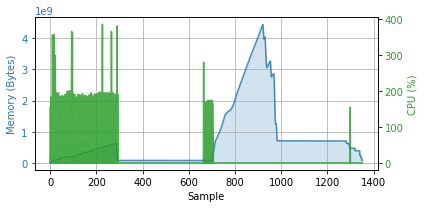

Total CPU time (seconds): 20.34
Max used memory (bytes): 4449951744


In [11]:
## CPU + MEMORY

# Set the figure's size
plt.rcParams["figure.figsize"] = (6,3)

# Data for plotting
x = np.arange(0, len(results_memory_values), 1)
memory_y = results_memory_values
cpu_y = results_cpu_percentages


color = 'tab:blue'
fig, ax_memory = plt.subplots()
ax_memory.grid()
ax_memory.set_xlabel('Sample')
ax_memory.set_ylabel('Memory (Bytes)', color=color)
ax_memory.plot(x, memory_y, color=color, alpha=0.8)
ax_memory.tick_params(axis='y', labelcolor=color)
plt.fill_between(x, memory_y, alpha=0.2, color=color)

color = 'tab:green'
ax_cpu = ax_memory.twinx()
ax_cpu.set_ylabel('CPU (%)', color=color)
ax_cpu.plot(x, cpu_y, color=color, alpha=0.8)
ax_cpu.tick_params(axis='y', labelcolor=color)
plt.fill_between(x, cpu_y, alpha=0.2, color=color)


plt.tight_layout()

# Delete figure file if it already exists and save the new one
figure_image_save_path = "resources/benchmark.png"
if os.path.exists(figure_image_save_path):
    os.remove(figure_image_save_path)
fig.savefig(figure_image_save_path)

plt.show()

print("Total CPU time (seconds): %s" % results["cpu"]["total_time"])
print("Max used memory (bytes): %s" % results["memory"]["max"])